## Q)Predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class'],header = None)
test_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class'],skiprows = 1, header = None)

In [3]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
#removing '?' containing rows
train_data = train_data[(train_data != ' ?').all(axis=1)]
#label the income objects as 0 and 1
train_data['wage_class']=train_data['wage_class'].map({' <=50K': 0, ' >50K': 1})

C:\Users\Sarthak Phatate\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [6]:
#removing '?' containing rows
test_data = test_data[(test_data != ' ?').all(axis=1)]
#label the income objects as 0 and 1
test_data['wage_class']=test_data['wage_class'].map({' <=50K.': 0, ' >50K.': 1})

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  wage_class      30162 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   fnlwgt          15060 non-null  int64 
 3   education       15060 non-null  object
 4   education_num   15060 non-null  int64 
 5   marital_status  15060 non-null  object
 6   occupation      15060 non-null  object
 7   relationship    15060 non-null  object
 8   race            15060 non-null  object
 9   sex             15060 non-null  object
 10  capital_gain    15060 non-null  int64 
 11  capital_loss    15060 non-null  int64 
 12  hours_per_week  15060 non-null  int64 
 13  native_country  15060 non-null  object
 14  wage_class      15060 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.8+ MB


In [9]:
train_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [10]:
test_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [11]:
col = ['workclass', 'education', 'education_num','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country','wage_class']

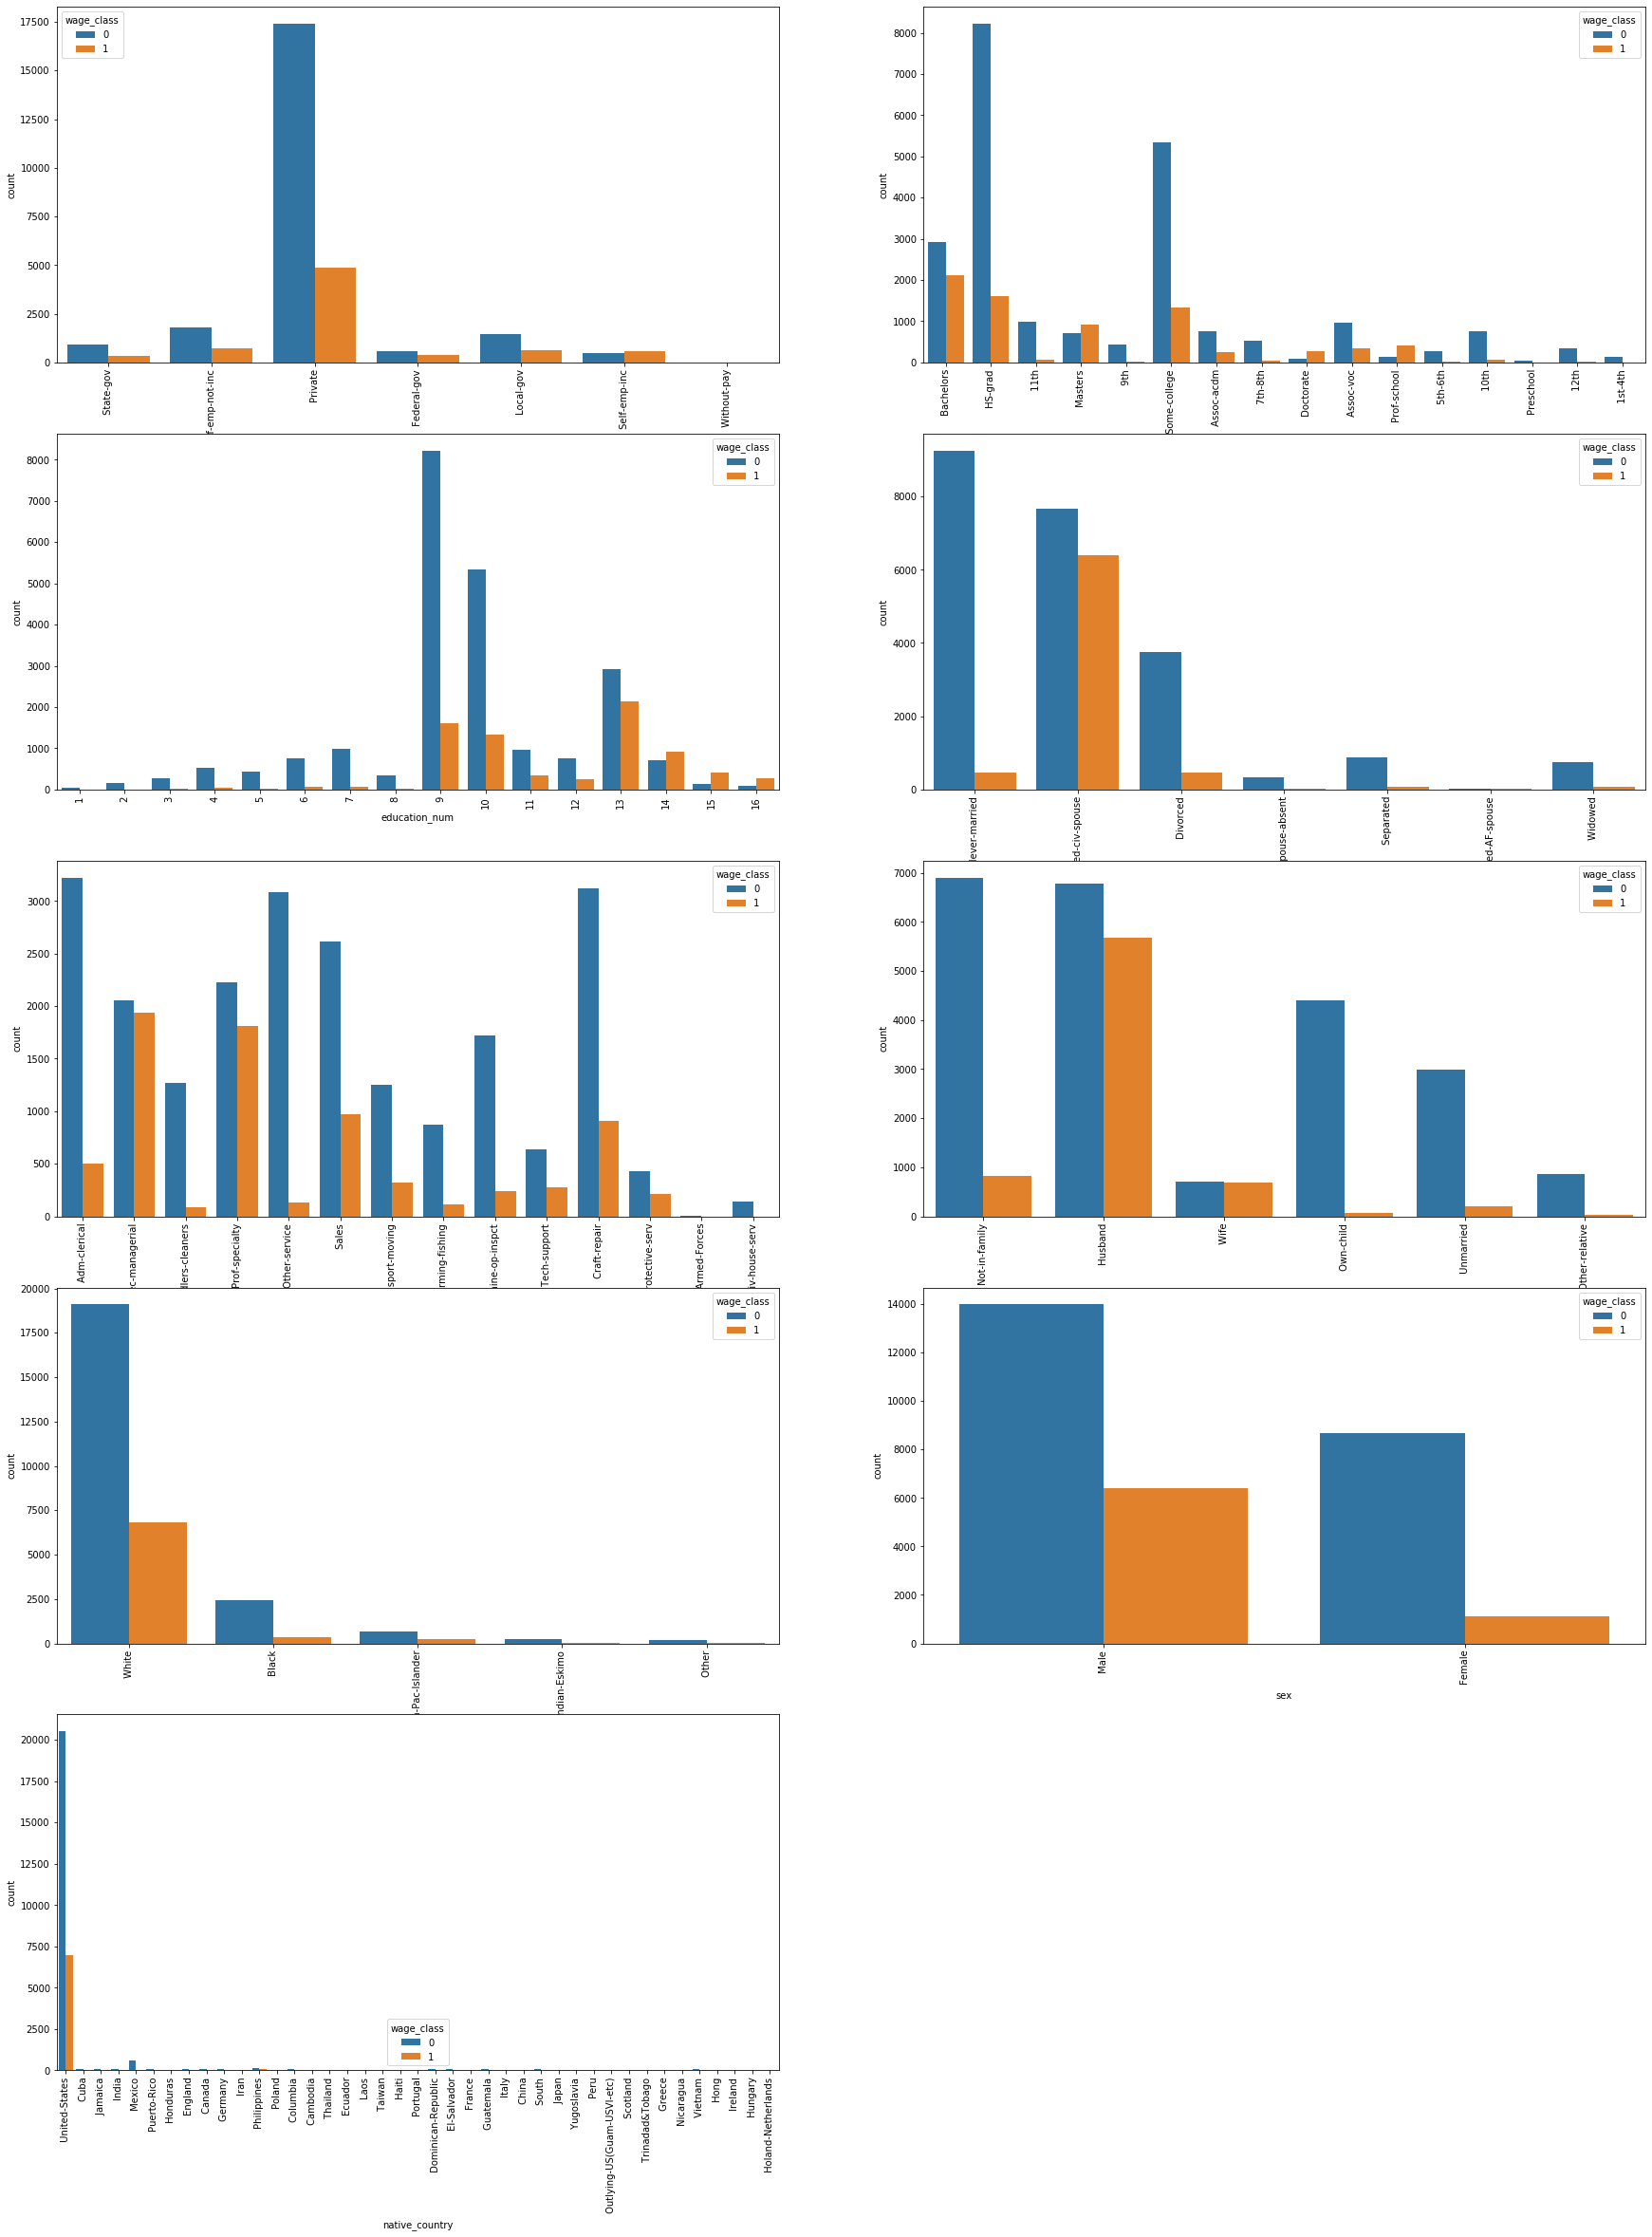

In [12]:
plt.figure(figsize=(30,40))
i=1
for name in col:
    if(i<10):
        ax = plt.subplot(5,2,i)
        plot = sns.countplot(x=train_data[name],hue='wage_class',data=train_data)
        plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
        i+=1

In [13]:
for name in col:
    dum = pd.get_dummies(train_data[name],drop_first=True)
    train_data = pd.concat([train_data,dum],axis=1).drop(columns=name)
    
for name in col:
    dum = pd.get_dummies(test_data[name],drop_first=True)
    test_data = pd.concat([test_data,dum],axis=1).drop(columns=name)

In [14]:
train_data.drop(columns=' Holand-Netherlands',inplace=True)

In [15]:
train_data.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,1
0,39,77516,2174,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test_data.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,1
0,25,226802,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,160323,7688,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,34,198693,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
x_train = train_data.drop(columns=1)
y_train = train_data[1]
x_test = test_data.drop(columns=1)
y_test = test_data[1]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(30162, 109) (30162,)
(15060, 109) (15060,)


In [18]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(30162, 109) (30162,)
(15060, 109) (15060,)


In [19]:
%%time
# fit model no training data
model = XGBClassifier(objective='binary:logistic')#,tree_method='gpu_hist', gpu_id=0)
model.fit(x_train, y_train)

Wall time: 16.6 s


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [20]:
# cheking training accuracy
y_pred = model.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy * 100

89.67243551488629

In [21]:
# cheking training accuracy
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy * 100

85.75033200531207